In [ ]:
install.packages("tidyverse")

In [3]:
library(ggplot2)
library(tibble)

Let's use the code provided below to generate a dataset representing two populations, each sampled from a Guassian with a specific population mean. Here I am generating only 5 samples

In [4]:
set.seed(110)
data_1 = tibble(measure=rnorm(5, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(5, 12, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)
complete_data

measure,site_name
<dbl>,<chr>
10.29120,Site 1
11.38886,Site 1
10.64901,Site 1
11.47788,Site 1
10.43872,Site 1
12.52232,Site 2
11.95539,Site 2
13.48441,Site 2
10.40899,Site 2


* I compute the mean of the dataset above using the following code:
  * feel free to deconstruct the code to see what each chunk does.


In [5]:
mean(complete_data[complete_data$site_name == "Site 1", ]$measure)
mean(complete_data[complete_data$site_name == "Site 2", ]$measure)

[1] 10.84913

[1] 12.11935

* Use the `tapply` function instead of the code above to compute the means samples from "Site 1" and those from site 2
  * See tapply for help if needed.

In [6]:
tapply(complete_data$measure, complete_data$site_name, mean)

Site 1   Site 2 
10.84913 12.11935

Q.2 

* Use the bootstrapping-procedure covered in class to assess whether there is a statistically significant difference between the data in `Site 1` and that in `Site 2`.

Make sure you follow the approach discussed in class and which consists of:

1. Selecting an appropriate test statistic
2. Bootstrapping a a distribuion for the observed statistic under the null hypothesis
3. Desciding whether to accept or reject the null based on the probability of the null
4. provide a p-value to support your decision.


In [7]:
set.seed(110)
data_1 = tibble(measure=rnorm(40, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(40, 13, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)

#### Q2.0 

Complete the following by describing the null and the alternative hypotheses we are testing here.


Null: There is NO difference in population between site 1 and site 2
Alternative: There is a difference in population between site 1 and site 2

#### Q.2.1 

Produce a graph similar the one below (geom_density) display the distributions. If you're using the same seed as mine, your graph will look exactly the same as the one below 

![](https://www.dropbox.com/s/rz5jxm84kk8ac1m/dist.png?dl=1)

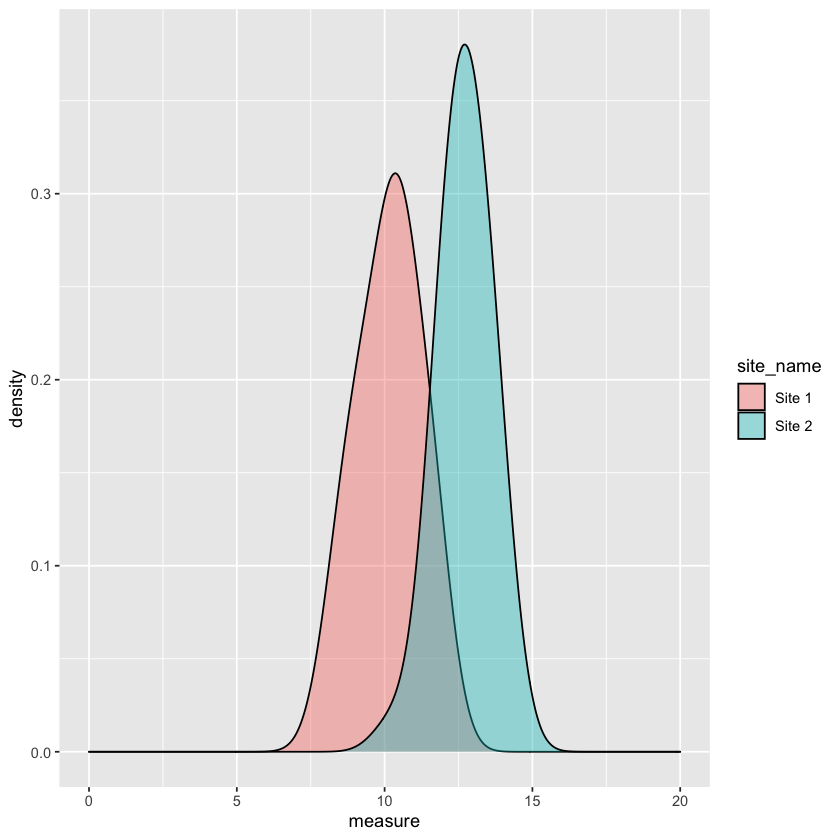

In [8]:
ggplot(complete_data, aes(x=measure, fill=site_name))+
geom_density(alpha=0.4,bw=0.65)+
xlim(0,20)

Q2.2 Select a proper test statistic and produce a distribution of the statistic under the null hypothesis. Plot the data as both a histogram and density curves. Your graph may look like this.

![](https://www.dropbox.com/s/3jarqg9swneai0r/mean_under_null.png?dl=1)

In [9]:
processOneIter = function(data_1, data_2){
    
    concat_data = c(data_1$measure, data_2$measure)
    len_concat_data = length(concat_data)
    
    len_data_1 = length(data_1)    
    shuffled_data = sample(concat_data)
    new_data_1 = shuffled_data[1:len_data_1]
    new_data_2 = shuffled_data[(len_data_1+1):len_concat_data]
    mean(new_data_1) - mean(new_data_2)
    
}
processOneIter(data_1, data_2)

[1] -0.7927603

In [10]:
mean_under_null=replicate(1000, processOneIter(data_1, data_2))
mean(mean_under_null)

[1] -0.01459144

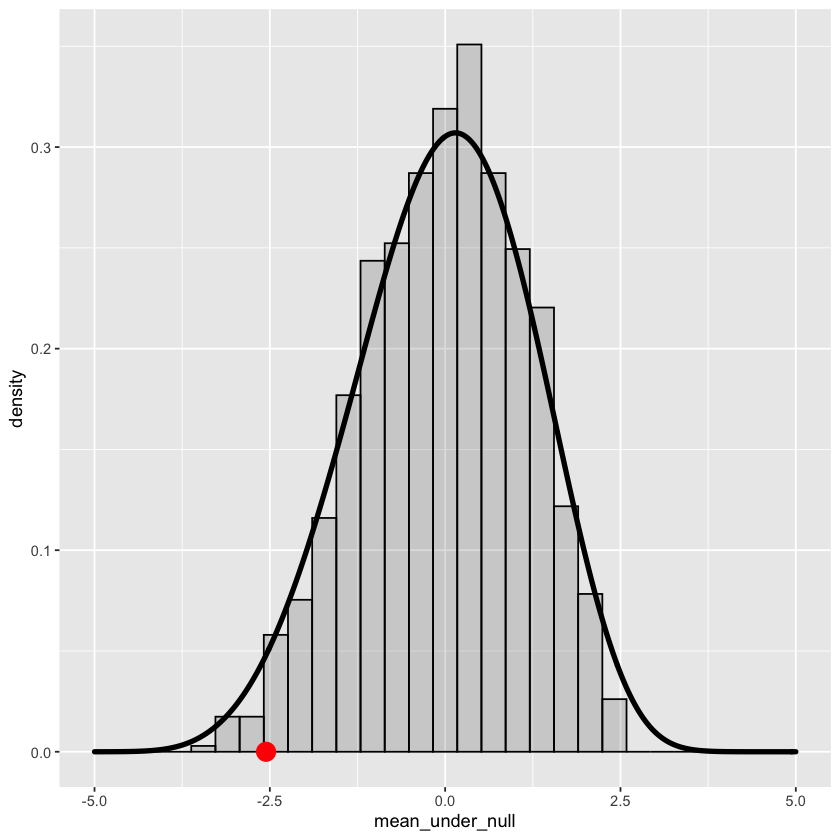

In [23]:
ggplot()+
  geom_histogram(aes(mean_under_null, y=..density..), bins =30, alpha=0.2, color="black") + 
  geom_density(aes(mean_under_null), bw=0.5, size=1.5) + 
  xlim(-5, 5)+
  geom_point(aes(observed_value, 0), color="red", size=5)

####  Q2.3. 

Calculate and plot the observed statistic on the graph you created in Q.2.2. 


In [12]:
observed_value = mean(data_1$measure) - mean(data_2$measure)
observed_value

[1] -2.553808

####  Q2.4. 

compute the p-vlaue of the observed statistic under the null. What do you conclude about the hypotheses you enunciated in Q

In [13]:
t.test(data_1$measure, data_2$measure, ) 


	Welch Two Sample t-test

data:  data_1$measure and data_2$measure
t = -12.056, df = 74.217, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.975853 -2.131763
sample estimates:
mean of x mean of y 
 10.14979  12.70360 


Reject null hypothesis- There IS a difference between site 1 and site 2. 

#### Q.3 

* The proportion of the of _P. lobata_, _M. capitata_ and _P. mendrina_ at a site X are c(0.60, 0.19, 0.21).
* You surveyed site Y with different environmental conditions and obtains the following proportions for the three corals (0.61, 0.19, 0.20). Use the multinomial non-parametric hypotheses test to assess whether the proportions obtained at sites X and Y are statistically different.


Although not explicitly required, your test should cover all the steps in Q2, i.e. appropriate graph(s) when possible, test statistics, and conclusion.

In [14]:
coral_data<-data.frame(Site_X = c(0.61, 0.19, 0.20), Site_Y = c(0.61, 0.19, 0.20))
as_tibble(coral_data)

Site_X,Site_Y
<dbl>,<dbl>
0.61,0.61
0.19,0.19
0.20,0.20


In [15]:
data_x = tibble(Proportion=c(0.60, 0.19, 0.21))
data_x$site_L<- 'Site X'
data_y = tibble(Proportion=c(0.61, 0.19, 0.20))
data_y$site_L<- 'Site Y'
coral_data = rbind(data_x, data_y)
coral_data

Proportion,site_L
<dbl>,<chr>
0.60,Site X
0.19,Site X
0.21,Site X
0.61,Site Y
0.19,Site Y
0.20,Site Y


In [16]:
tapply(coral_data$Proportion, coral_data$site_L, mean)

Site X    Site Y 
0.3333333 0.3333333

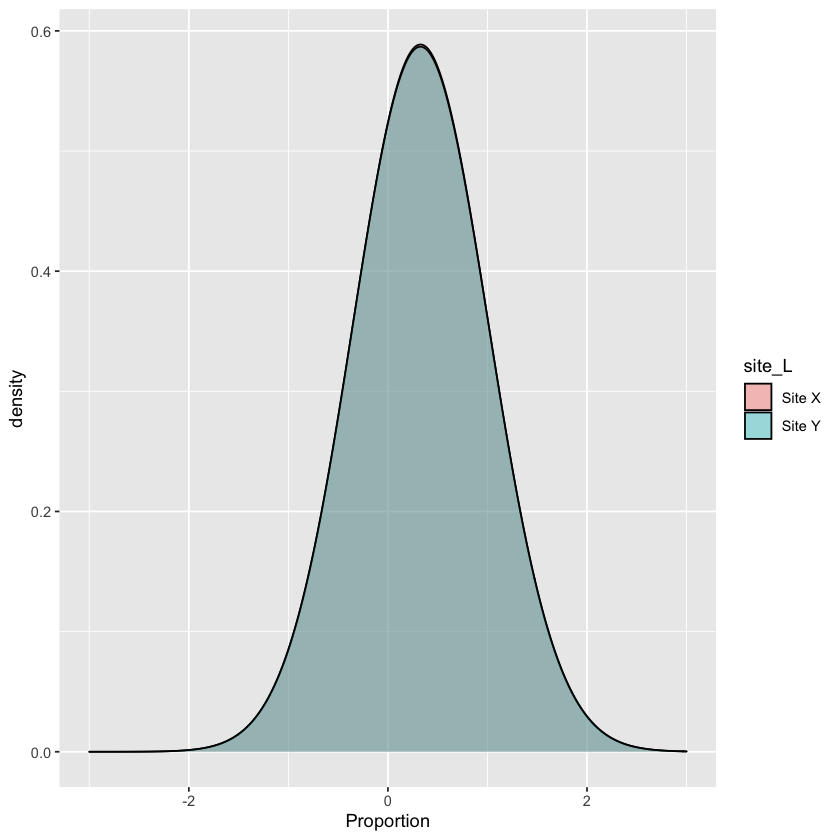

In [17]:
ggplot(coral_data, aes(x=Proportion, fill=site_L))+
geom_density(alpha=0.4,bw=0.65)+
xlim(-3,3)

In [24]:
processOneIter_2 = function(data_x, data_y){
    
    coral_concat_data = c(data_x$Proportion, data_y$Proportion)
    coral_len_concat_data = length(coral_concat_data)
    
    len_data_x = length(data_x)    
    shuffled_data_2 = sample(coral_concat_data)
    new_data_x = shuffled_data_2[1:len_data_x]
    new_data_y = shuffled_data_2[(len_data_x+1):coral_len_concat_data]
    mean(new_data_x) - mean(new_data_y)
    
}
processOneIter_2(data_x, data_y)

[1] -0.2075

In [25]:
mean_under_null_2=replicate(1000, processOneIter_2(data_x, data_y))
mean(mean_under_null_2)

[1] -0.00617

In [47]:
observed_value_2 = mean(data_x$Proportion) - mean(data_y$Proportion)
observed_value_2

[1] 0

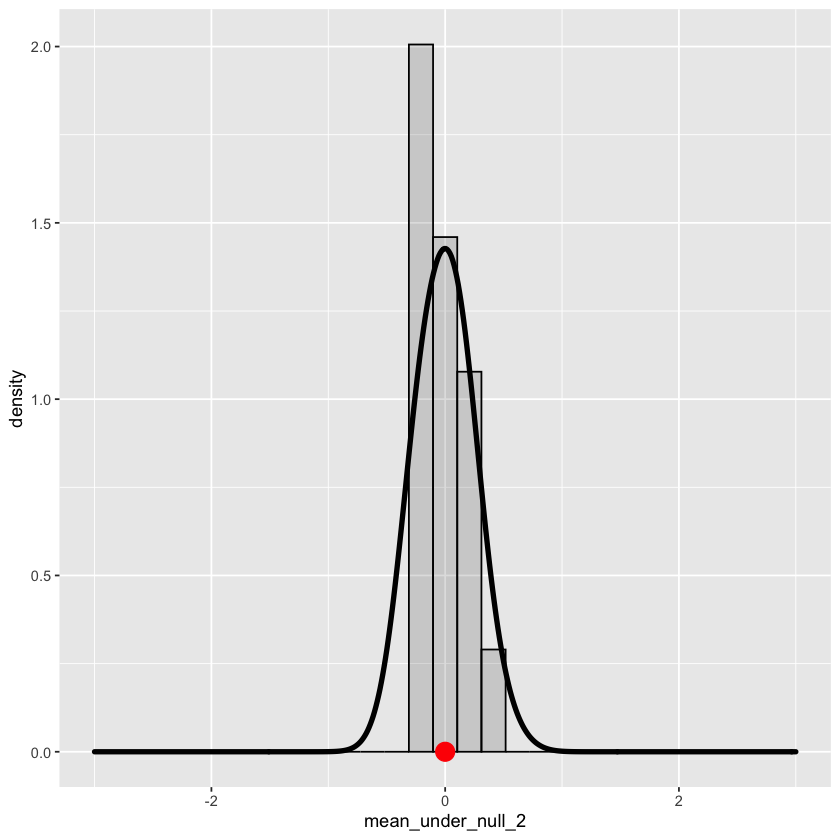

In [51]:
ggplot()+
  geom_histogram(aes(mean_under_null_2, y=..density..), bins =30, alpha=0.2, color="black") + 
  geom_density(aes(mean_under_null_2), bw=0.2, size=1.5) + 
  xlim(-3, 3)+
  geom_point(aes(observed_value_2, 0), color="red", size=5)

In [52]:
t.test(data_y$Proportion, data_y$Proportion, ) 


	Welch Two Sample t-test

data:  data_y$Proportion and data_y$Proportion
t = 0, df = 4, p-value = 1
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5432822  0.5432822
sample estimates:
mean of x mean of y 
0.3333333 0.3333333 


Data supports the null hypothesis that there is NO difference between site x and site y.